## Linear Regression & Regularization Exercise.
###### (All Latex taken from the Y-Data School of Data Science exercise)



## Outline
1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

### Ordinary Least Square (OLS) aka Linear Regeression 

Our objective is to optimize the loss $L$ defined as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ 

Thus, the gradient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.



## Exercise 1 - Ordinary Least Square
Order of Operations:

* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set).

* Fit the model, and plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times, and find the average MSE for train and test.

* Use a t-test to prove that the MSE for training is significantly smaller than for testing. What is the p-value? 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradient descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance.


a) load boston dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston;
X, y = load_boston(return_X_y = True);
data = load_boston();
df = pd.DataFrame(data.data, columns = data.feature_names);
df.head()

b) Write a model for Ordinary Linear Regression

In [34]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X): #The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.
    padding = np.ones(( X.shape[0], 1,))
    return np.hstack((padding, X))
  
  def fit(self, X, Y):
    #remeber pad with 1 before fitting
    self.X = self.pad(np.array(X))
    self.Y = np.array(Y)
    self.w = np.linalg.pinv(self.X) @ self.Y
  
  def _fit(self, X, Y):
    # optional to use this
    pass
  
  def predict(self, X):
    self.X = self.pad(X) #Pads the new input, now is same dimensionality as w
    self.labels = self.X @ self.w
    return self.labels
    
  def _predict(self, X):
    # optional to use this
    pass
    
  def score(self, X, Y):
    # w = self.fit(X,Y)
    self.X = X
    self.Y = Y
    pred = self.predict(self.X) #predict does the padding for X
    return np.square(np.subtract(self.Y ,pred)).mean()
    # return np.sum((self.Y - pred)**2) / Y.shape[0]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

c) MSE on the Training Set

In [36]:
ols = Ols()
ols.fit(X,y)
ols.score(X,y)

21.894831181729202

In [37]:
#Checking rsults with sklean
reg = LinearRegression()
reg.fit(X,y)
mean_squared_error(y, reg.predict(X))

21.894831181729206

d) Scatter plot

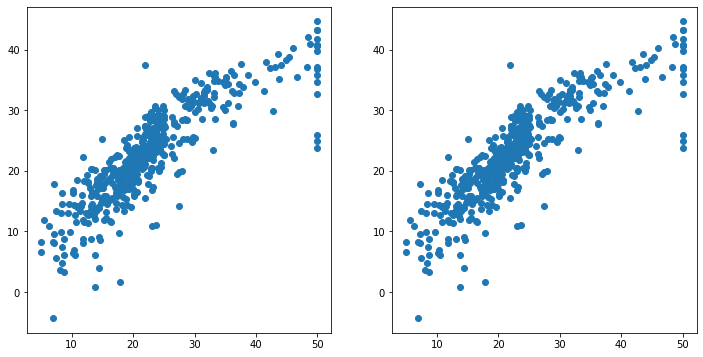

In [38]:
import matplotlib.pyplot as plt

ols_pred = ols.predict(X)
fig = plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.scatter(y ,ols_pred)

plt.subplot(1,2,2)
reg = LinearRegression().fit(X,y)
pred = reg.predict(X)
plt.scatter(y, pred)

e) Average over 20 samples

In [39]:
avg_mse_test = []
for i in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= .25, shuffle= True)
    GD = Ols()
    GD.fit(X_train, Y_train)
    GD.predict(X_test)
    # avg_mse.append( 1/Y_test.size * np.sum(GD.labels - Y_test)**2)
    avg_mse_test.append(GD.score(X_test, Y_test))
np.mean(avg_mse_test)

23.76661062843534

In [40]:
#AVerage MSE for the training set
avg_mse_train = []
for i in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= .25, shuffle= True)
    reg = LinearRegression()
    reg.fit(X_train,Y_train)
    avg_mse_train.append(mean_squared_error(Y_train, reg.predict(X_train)))

np.mean(avg_mse_train)



21.481290042129807

F) T-Test

In [41]:
from scipy import stats
stat, p_value = stats.ttest_rel(avg_mse_train, avg_mse_test, alternative= 'less')
print(f'Results: We see that the Avg MSE for the training set is less than the Avg MSE for the Test set with a extreme significance level (P value ={p_value}), which lies within the 1% siginificance range')

Results: We see that the Avg MSE for the training set is less than the Avg MSE for the Test set with a extreme significance level (P value =0.03037225870657512), which lies within the 1% siginificance range


G) Create Model using Gradient Descent

In [60]:
# Write a new class OlsGd which solves the problem using gradient descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer(Ols):
  def __init__(self):
    pass

  def fit(self, X):
    return np.array(X)

  def predict(self, X):
    self.X = self.fit(X)
    self.norm = self.X = (self.X - self.X.mean()) / self.X.std()
    # self.norm = (X - X.min() )/ (X.max() - X.min())

    return self.norm

class OlsGd(Ols):
  
  def __init__(self, learning_rate=0.05, 
               num_iteration=100000, #changed to 10,000 for better results
               normalize=True,
               early_stop=True,
               verbose=True):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    #Would like to have check if numpy was imported already

  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting. "Can set IF normalizer =True do GS, else return OLS"
    self.X = self.pad(self.normalizer.predict(X))  # Add padding after the normalizer
    # self.X = self.pad(X)
    self.MSE_log = []
    self.Y = Y


    self.w = np.random.normal(size = (self.X.shape[1])) #random initialization of W's
    iteration = 0
    while iteration < self.num_iteration:
      self.w = self.w - (self.learning_rate * (1/self.Y.size) * self.X.T @ ((self.X @ self.w) - self.Y))
                         #                         Normalize           X               Error
      iteration +=1

     
      self.MSE_log.append(1/self.Y.size * np.sum(((self.X @ self.w) - self.Y)**2))
    self.MSE = self.MSE_log[-1]


  def _predict(self, X):
    self.X = X
    self.X = self.normalizer.predict(self.X)
    self.labels = self.pad(self.X) @ self.w #added padding to make dimensionality equal to 14
    
  def _step(self, X, Y):
    # use w update for gradient descent
    pass

In [61]:
# X = grad.pad(X)
grad = OlsGd()
grad._fit(X,y)
grad._predict(X)
y_pred = grad.labels #Adding a pad here didn't help
grad.MSE

28.683041383319164

WARNING TO SELF:

Becareful on the name of the methods.

'_' before belongs to gradient descent, without the '_' does not!

plotting the rate of convergence

Text(0.5, 0, 'Iterations')

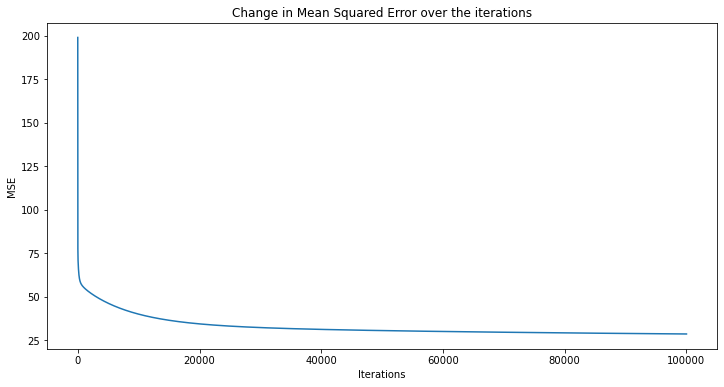

In [62]:
plt.figure(figsize = (12,6))
plt.plot(range(grad.num_iteration), grad.MSE_log);
plt.title('Change in Mean Squared Error over the iterations')
plt.ylabel('MSE')
plt.xlabel('Iterations')

a) Effect of the Learning Rate: The learnging rate causes the MSE to decline very steeply in the beginning, while still being small enough to allow it to slowly converge and not "overshoot" the local minima. Instead of passing the iterations as an arguement, we could set a threshold level and pass early_stop as true. This would tell the gradient descent to break, after it stops imporving by more than the specified, incremental amount.

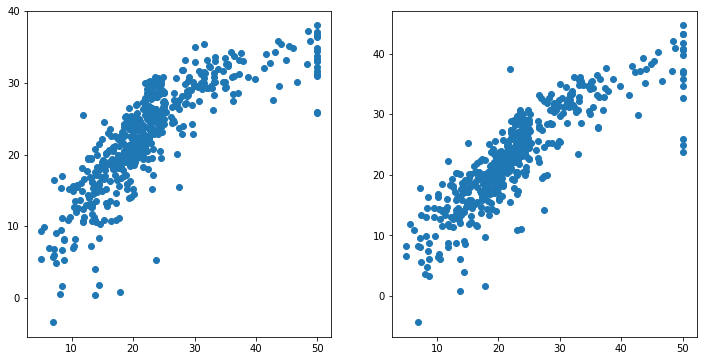

In [63]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.scatter(y ,y_pred)

plt.subplot(1,2,2)
reg = LinearRegression().fit(X,y)
pred = reg.predict(X)
plt.scatter(y, pred)

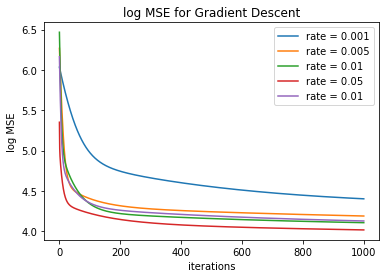

In [79]:
for i in [0.001,0.005,0.01,0.05, 0.01]:
    grad = OlsGd(learning_rate=i,num_iteration=1000)
    grad._fit(X,y)
    y_pred= grad._predict(X)
    lab='rate = '+str(i)
    plt.plot(range(grad.num_iteration), np.log(grad.MSE_log), label=lab)
    
  
plt.xlabel('iterations')
plt.ylabel('log MSE')
plt.title("log MSE for Gradient Descent")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()